In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data to Clean - Sheet1.csv')

In [4]:
df.head()

,Current Area and City of Residence?,A brief about you and your interests?,Which of the following will best describe your current profession?,Your startup/expertise lies in which of the following industries? (Try to be as specific as possible),What is your domain of expertise? (Try to be as specific as possible),Stage of your startup/Employer?,Any specific connect you are currently seeking?,Why are you seeking the above mentioned Connect?,How do you think you can help other pushstarters?
0,Mumbai,"PhD student, crowndfunding for travelling to r...","Post-Graduate Student, Startup Founder, Mentor...",Edu-tech,"Sales, Product Design, Digital Marketing, Comm...",MVP (proof of concept is out with select custo...,NaN,"Business Partnership, speaking gigs, tech supp...",Mentor students in choosing Research areas and...
1,Bhubneswar,NaN,"Under-Graduate Student, freelancer",Content Writing,Digital Marketing,Don't have a startup,NaN,NaN,NaN
2,"Uppal, Hyderabad",NaN,"Under-Graduate Student, Working Professional","Fin Tech, Food Tech, Hospitality","Operations, Sales","Growth (multiple customer, positive revenue, m...",NaN,Community and build connections,Whatever I can....
3,Hyderabad,NaN,Working Professional,"Fin Tech, AI","Product Development, Product Design","Growth (multiple customer, positive revenue, m...",NaN,NaN,NaN
4,Vijayawada,NaN,freelancer,Media and Advertising,"Sales, Product Development, Digital Marketing,...","Growth (multiple customer, positive revenue, m...",NaN,NaN,"Business Development, Growth Statergies"


##### From the above Data Frame we can see that there is no numerical value and a lot of missing values.

In [5]:
df.describe().T

,count,unique,top,freq
Current Area and City of Residence?,549,206,Pune,71
A brief about you and your interests?,405,404,Entrepreneurship,2
Which of the following will best describe your current profession?,549,112,Working Professional,78
Your startup/expertise lies in which of the following industries? (Try to be as specific as possible),547,371,AI,25
What is your domain of expertise? (Try to be as specific as possible),549,272,Product Development,44
Stage of your startup/Employer?,548,36,"Growth (multiple customer, positive revenue, m...",149
Any specific connect you are currently seeking?,150,100,pushconnect,25
Why are you seeking the above mentioned Connect?,524,467,No,16
How do you think you can help other pushstarters?,534,526,Yes,3


In [6]:
df.columns

Index(['Current Area and City of Residence? ',
       'A brief about you and your interests? ',
       'Which of the following will best describe your current profession? ',
       'Your startup/expertise lies in which of the following industries? (Try to be as specific as possible)',
       'What is your domain of expertise? (Try to be as specific as possible)',
       'Stage of your startup/Employer? ',
       'Any specific connect you are currently seeking? ',
       'Why are you seeking the above mentioned Connect? ',
       'How do you think you can help other pushstarters? '],
      dtype='object')

## Data cleansing section

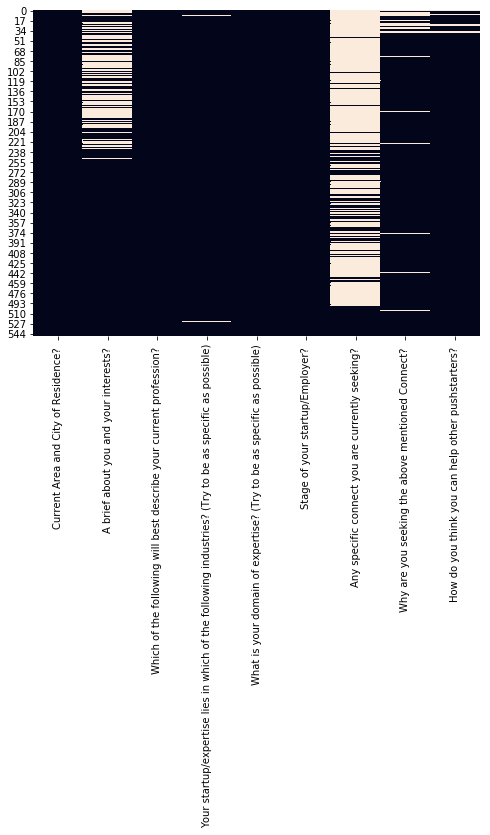

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False)

##### From the above heat map we conclude the following-
* most of the missing values are int he column"Any specific connect you are currently seeking for"

In [8]:
 total= df.isnull().sum().sort_values(ascending = False)


In [9]:
percentage = df.isnull().sum()/len(df)

In [10]:
temp = pd.concat([total, percentage], axis = 1,keys = ['total','percentage'])
temp.head()

,total,percentage
A brief about you and your interests?,144,0.262295
Any specific connect you are currently seeking?,399,0.726776
Current Area and City of Residence?,0,0.000000
How do you think you can help other pushstarters?,15,0.027322
Stage of your startup/Employer?,1,0.001821


##### The column 'Any specific connect you are currently seeking? ' is having more that 72% missing values so its better to remove that column from our dataset.

In [11]:
df.drop('Any specific connect you are currently seeking? ',axis=1,inplace=True)

In [12]:
df.head(2)

,Current Area and City of Residence?,A brief about you and your interests?,Which of the following will best describe your current profession?,Your startup/expertise lies in which of the following industries? (Try to be as specific as possible),What is your domain of expertise? (Try to be as specific as possible),Stage of your startup/Employer?,Why are you seeking the above mentioned Connect?,How do you think you can help other pushstarters?
0,Mumbai,"PhD student, crowndfunding for travelling to r...","Post-Graduate Student, Startup Founder, Mentor...",Edu-tech,"Sales, Product Design, Digital Marketing, Comm...",MVP (proof of concept is out with select custo...,"Business Partnership, speaking gigs, tech supp...",Mentor students in choosing Research areas and...
1,Bhubneswar,NaN,"Under-Graduate Student, freelancer",Content Writing,Digital Marketing,Don't have a startup,NaN,NaN


##### Changeing the names of the columns for convenience.

In [26]:
df.rename(index=str, columns={'Current Area and City of Residence? ': "City",'A brief about you and your interests? ':'Intrests',
                            'Which of the following will best describe your current profession? ':'Current Position'
,'Your startup/expertise lies in which of the following industries? (Try to be as specific as possible)':'Start-up(Industries)',
                             'What is your domain of expertise? (Try to be as specific as possible)':'Domain Expertise',
                             'Stage of your startup/Employer?':'Stage of Start-UP'},inplace=True)

In [28]:
df

,City,Intrests,Current Position,Start-up(Industries),Domain Expertise,Stage of your startup/Employer?,Why are you seeking the above mentioned Connect?,How do you think you can help other pushstarters?
0,Mumbai,"PhD student, crowndfunding for travelling to r...","Post-Graduate Student, Startup Founder, Mentor...",Edu-tech,"Sales, Product Design, Digital Marketing, Comm...",MVP (proof of concept is out with select custo...,"Business Partnership, speaking gigs, tech supp...",Mentor students in choosing Research areas and...
1,Bhubneswar,NaN,"Under-Graduate Student, freelancer",Content Writing,Digital Marketing,Don't have a startup,NaN,NaN
2,"Uppal, Hyderabad",NaN,"Under-Graduate Student, Working Professional","Fin Tech, Food Tech, Hospitality","Operations, Sales","Growth (multiple customer, positive revenue, m...",Community and build connections,Whatever I can....
3,Hyderabad,NaN,Working Professional,"Fin Tech, AI","Product Development, Product Design","Growth (multiple customer, positive revenue, m...",NaN,NaN
4,Vijayawada,NaN,freelancer,Media and Advertising,"Sales, Product Development, Digital Marketing,...","Growth (multiple customer, positive revenue, m...",NaN,"Business Development, Growth Statergies"
5,Bengaluru,Aspiring entrepreneur; worked on 2 startups - ...,"Under-Graduate Student, Startup Founder",Agri Tech,"Operations, Sales, Product Development, Produc...",Don't have a startup,NaN,NaN
6,hyderabad,"Hi ,am sankeerth am an undergrad at bits pilan...","Under-Graduate Student, Startup Founder, freel...",Product based and travel,"Operations, Digital Marketing",Ideation (brainstorming around few ideas),NaN,I would love to know there problems and can he...
7,Hyderabad,I'm a student of BITS Pilani Hyderabad Campus ...,Under-Graduate Student,"Fin Tech, AI, Blockchain","Operations, Product Development, Digital Marke...",Don't have a startup,NaN,NaN
8,Visakhapatnam,https://www.facebook.com/RobertDeWittBukater,"Under-Graduate Student, Startup Founder, Mentor","Food Tech, Corporate Finance | Investment Stra...","Operations, Community building","Growth (multiple customer, positive revenue, m...",Whenever I come across anything for which I ne...,"Ecosystem building, Mentoring, Market Research..."
9,Hyderabad,NaN,Startup Founder,NaN,Sales,MVP (proof of concept is out with select custo...,NaN,Through leads if i knw smeone


In [41]:
df['Intrests'].fillna('no record ',inplace=True)
df['Why are you seeking the above mentioned Connect? '].fillna('no record',inplace=True)
df['How do you think you can help other pushstarters? '].fillna('no record',inplace=True)

In [42]:
df

,City,Intrests,Current Position,Start-up(Industries),Domain Expertise,Stage of your startup/Employer?,Why are you seeking the above mentioned Connect?,How do you think you can help other pushstarters?
0,Mumbai,"PhD student, crowndfunding for travelling to r...","Post-Graduate Student, Startup Founder, Mentor...",Edu-tech,"Sales, Product Design, Digital Marketing, Comm...",MVP (proof of concept is out with select custo...,"Business Partnership, speaking gigs, tech supp...",Mentor students in choosing Research areas and...
1,Bhubneswar,no record,"Under-Graduate Student, freelancer",Content Writing,Digital Marketing,Don't have a startup,no record,no record
2,"Uppal, Hyderabad",no record,"Under-Graduate Student, Working Professional","Fin Tech, Food Tech, Hospitality","Operations, Sales","Growth (multiple customer, positive revenue, m...",Community and build connections,Whatever I can....
3,Hyderabad,no record,Working Professional,"Fin Tech, AI","Product Development, Product Design","Growth (multiple customer, positive revenue, m...",no record,no record
4,Vijayawada,no record,freelancer,Media and Advertising,"Sales, Product Development, Digital Marketing,...","Growth (multiple customer, positive revenue, m...",no record,"Business Development, Growth Statergies"
5,Bengaluru,Aspiring entrepreneur; worked on 2 startups - ...,"Under-Graduate Student, Startup Founder",Agri Tech,"Operations, Sales, Product Development, Produc...",Don't have a startup,no record,no record
6,hyderabad,"Hi ,am sankeerth am an undergrad at bits pilan...","Under-Graduate Student, Startup Founder, freel...",Product based and travel,"Operations, Digital Marketing",Ideation (brainstorming around few ideas),no record,I would love to know there problems and can he...
7,Hyderabad,I'm a student of BITS Pilani Hyderabad Campus ...,Under-Graduate Student,"Fin Tech, AI, Blockchain","Operations, Product Development, Digital Marke...",Don't have a startup,no record,no record
8,Visakhapatnam,https://www.facebook.com/RobertDeWittBukater,"Under-Graduate Student, Startup Founder, Mentor","Food Tech, Corporate Finance | Investment Stra...","Operations, Community building","Growth (multiple customer, positive revenue, m...",Whenever I come across anything for which I ne...,"Ecosystem building, Mentoring, Market Research..."
9,Hyderabad,no record,Startup Founder,NaN,Sales,MVP (proof of concept is out with select custo...,no record,Through leads if i knw smeone


# THANK YOU !!